In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
train_df = pd.read_csv('https://raw.githubusercontent.com/SreeramRajeev/Datasets/main/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/SreeramRajeev/Datasets/main/test.csv')

In [ ]:
train_df.head(100)

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,25.0,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,30.0,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
95,48.0,26.0,Non-binary,Facebook,75.0,2.0,28.0,11.0,18.0,Anxiety
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,49.0,32.0,Male,Instagram,130.0,5.0,70.0,19.0,31.0,Neutral
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_df = train_df.dropna()
test_df = test_df.dropna()
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [ ]:
train_df = train_df.drop(columns=['User_ID'])
test_df = test_df.drop(columns=['User_ID'])

In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   float64
 1   Gender                      1000 non-null   object 
 2   Platform                    1000 non-null   object 
 3   Daily_Usage_Time (minutes)  1000 non-null   float64
 4   Posts_Per_Day               1000 non-null   float64
 5   Likes_Received_Per_Day      1000 non-null   float64
 6   Comments_Received_Per_Day   1000 non-null   float64
 7   Messages_Sent_Per_Day       1000 non-null   float64
 8   Dominant_Emotion            1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----

In [ ]:
train_df['Dominant_Emotion'].value_counts()

Dominant_Emotion
Happiness    200
Neutral      200
Anxiety      170
Sadness      160
Boredom      140
Anger        130
Name: count, dtype: int64

In [ ]:
for column in train_df.columns:
    print(f"Unique values in {column}:", train_df[column].unique())

Unique values in Age: [25. 30. 22. 28. 33. 21. 27. 24. 29. 31. 23. 26. 34. 35. 32.]
Unique values in Gender: ['Female' 'Male' 'Non-binary']
Unique values in Platform: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']
Unique values in Daily_Usage_Time (minutes): [120.  90.  60. 200.  45. 150.  85. 110.  55. 170.  75.  95.  65. 180.
 100.  40. 125.  50. 140. 105. 190.  70.  80. 160. 145. 130. 115. 175.
 165. 155.]
Unique values in Posts_Per_Day: [3. 5. 2. 8. 1. 4. 6. 7.]
Unique values in Likes_Received_Per_Day: [ 45.  20.  15. 100.   5.  60.  30.  25.  10.  80.  35.  12.  90.  40.
  55.  33.   8.  70.  28.  11.  95.  18.   9.  85.  38.   6.  13.  75.
  27.  88.  22.  78.  29.  50.  36.  72.  65. 110.  14.  17. 105.  43.
  37.  42.  48.  21.  24.  23.  83.]
Unique values in Comments_Received_Per_Day: [10. 25.  5. 30.  2. 15. 12.  3. 20.  7.  4. 23. 18. 22. 14. 26.  8. 19.
 17. 11.  6.  9. 13. 40. 16. 35. 38. 28. 36. 33.]
Unique values in Messages_Sent_Per_Day

<ipython-input-33-46825c78565e>:1: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Dominant_Emotion', hue='Dominant_Emotion', data=train_df, palette=['Blue', 'Red'])


<Axes: xlabel='Dominant_Emotion', ylabel='count'>

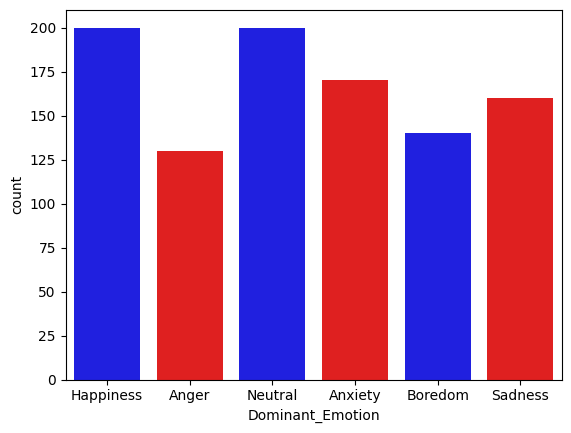

In [ ]:
sns.countplot(x='Dominant_Emotion', hue='Dominant_Emotion', data=train_df, palette=['Blue', 'Red'])

In [ ]:
combined_df = pd.concat([train_df, test_df])

In [ ]:
combined_df.shape

(1103, 9)

In [ ]:
# from sklearn.ensemble import IsolationForest

# iso_forest = IsolationForest(contamination=0.01)

# outliers = iso_forest.fit_predict(train_df.select_dtypes(include=[np.number]))

# outlier_indices = train_df[outliers == -1].index
# print("Outliers identified at indices:", outlier_indices)


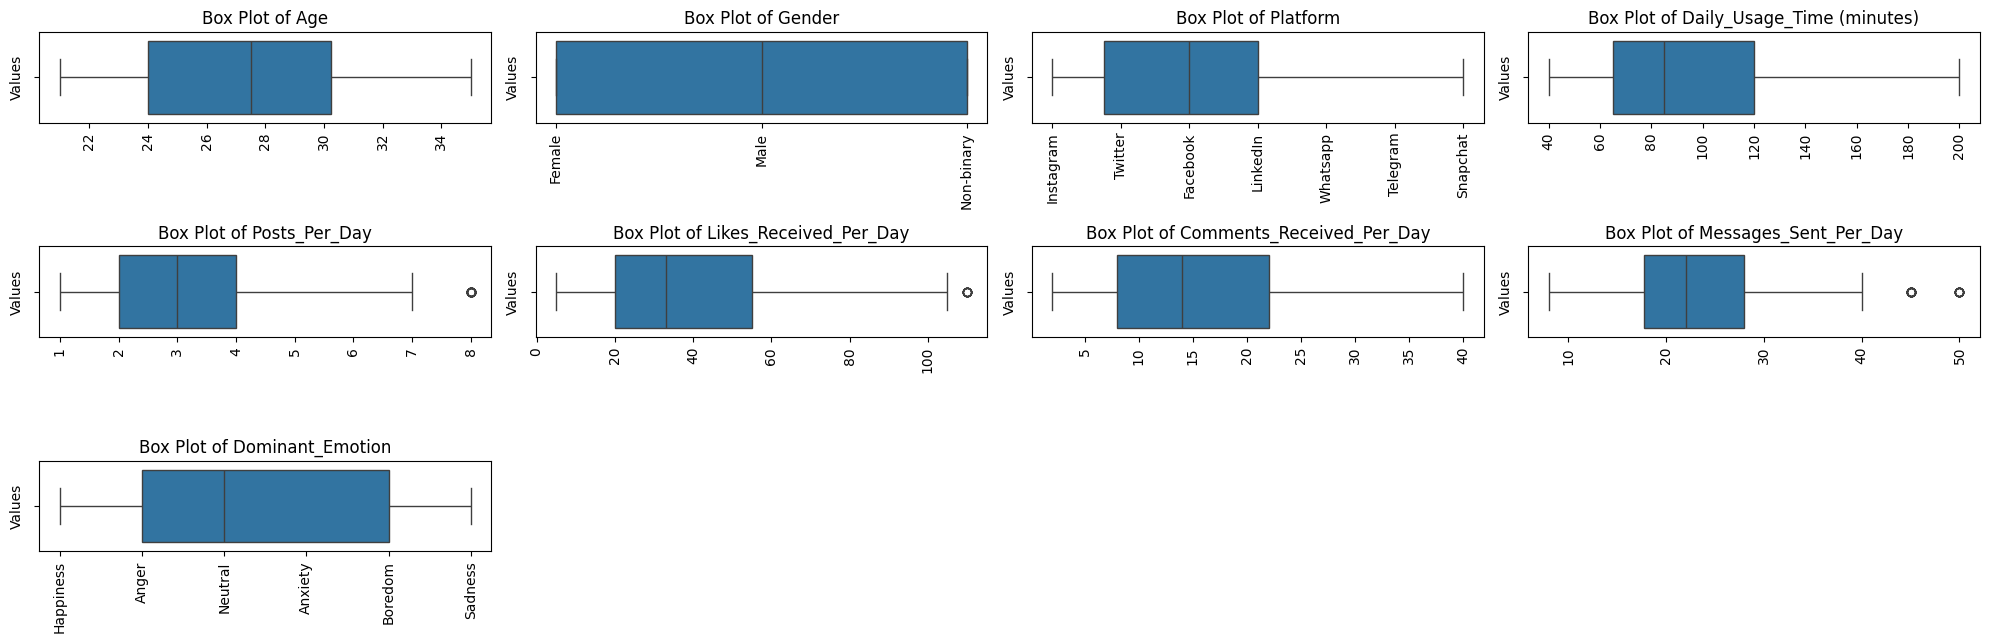

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = train_df.columns

plt.figure(figsize=(20, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(x=train_df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Platform']:
    le = LabelEncoder()
    combined_df[column] = le.fit_transform(combined_df[column])
    train_df[column] = le.transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

In [ ]:
# Split the data into features and labels
X_train = train_df.drop(columns=['Dominant_Emotion'])
y_train = train_df['Dominant_Emotion']
X_test = test_df.drop(columns=['Dominant_Emotion'])
y_test = test_df['Dominant_Emotion']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the models
models = {
    'SVC': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}


SVC Model Evaluation:
Cross-validated accuracies: [0.73  0.805 0.755 0.765 0.78 ]
Mean accuracy: 0.767
Test Accuracy: 0.7766990291262136
Test Confusion Matrix:
[[ 8  0  0  0  0  1]
 [ 1 15  4  0  0  2]
 [ 0  0 14  0  1  1]
 [ 1  0  0 13  0  0]
 [ 0  5  1  0 20  2]
 [ 0  1  1  0  2 10]]
Test Classification Report:
              precision    recall  f1-score   support

       Anger       0.80      0.89      0.84         9
     Anxiety       0.71      0.68      0.70        22
     Boredom       0.70      0.88      0.78        16
   Happiness       1.00      0.93      0.96        14
     Neutral       0.87      0.71      0.78        28
     Sadness       0.62      0.71      0.67        14

    accuracy                           0.78       103
   macro avg       0.78      0.80      0.79       103
weighted avg       0.79      0.78      0.78       103



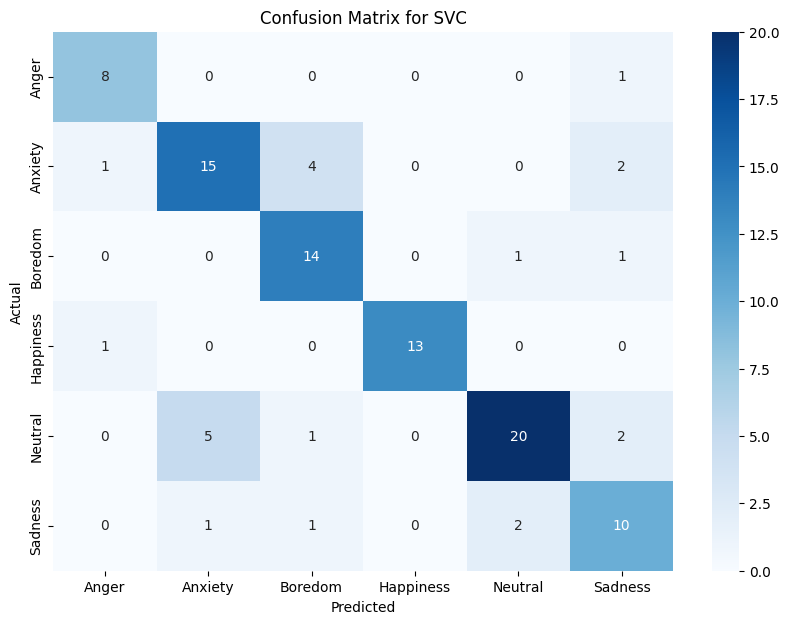


Logistic Regression Model Evaluation:
Cross-validated accuracies: [0.495 0.575 0.52  0.565 0.56 ]
Mean accuracy: 0.5429999999999999
Test Accuracy: 0.5339805825242718
Test Confusion Matrix:
[[ 5  0  0  1  0  3]
 [ 4 12  4  1  1  0]
 [ 1  0 11  0  4  0]
 [ 1  2  0 10  1  0]
 [ 0  3  4  3 16  2]
 [ 0  3  3  1  6  1]]
Test Classification Report:
              precision    recall  f1-score   support

       Anger       0.45      0.56      0.50         9
     Anxiety       0.60      0.55      0.57        22
     Boredom       0.50      0.69      0.58        16
   Happiness       0.62      0.71      0.67        14
     Neutral       0.57      0.57      0.57        28
     Sadness       0.17      0.07      0.10        14

    accuracy                           0.53       103
   macro avg       0.49      0.52      0.50       103
weighted avg       0.51      0.53      0.52       103



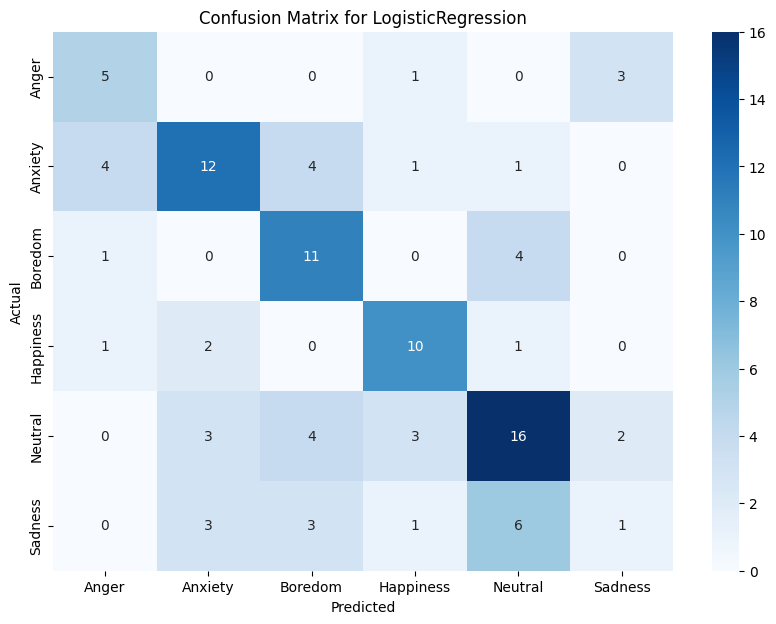


Random Forest Model Evaluation:
Cross-validated accuracies: [0.99  0.965 0.99  0.995 0.99 ]
Mean accuracy: 0.9860000000000001
Test Accuracy: 0.9611650485436893
Test Confusion Matrix:
[[ 9  0  0  0  0  0]
 [ 0 21  0  1  0  0]
 [ 0  0 14  0  1  1]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 28  0]
 [ 0  0  1  0  0 13]]
Test Classification Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00         9
     Anxiety       1.00      0.95      0.98        22
     Boredom       0.93      0.88      0.90        16
   Happiness       0.93      1.00      0.97        14
     Neutral       0.97      1.00      0.98        28
     Sadness       0.93      0.93      0.93        14

    accuracy                           0.96       103
   macro avg       0.96      0.96      0.96       103
weighted avg       0.96      0.96      0.96       103



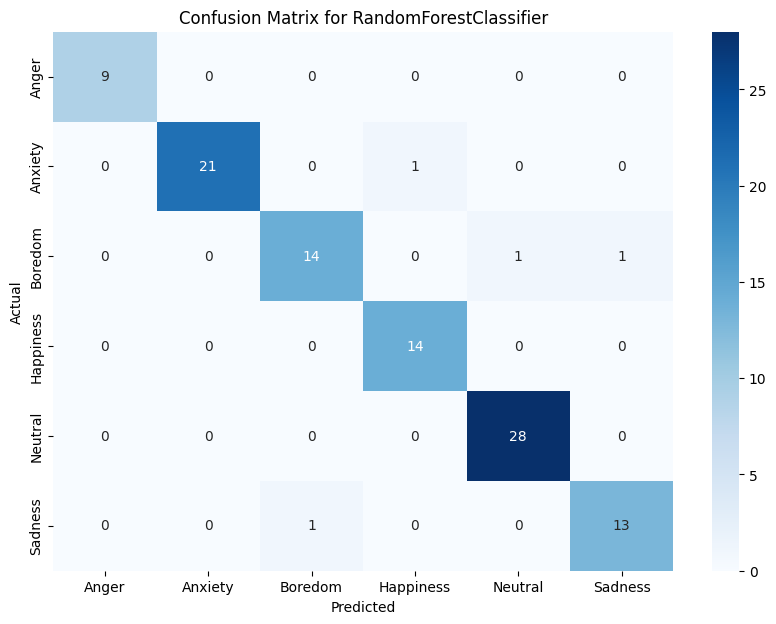


K-Nearest Neighbors Model Evaluation:
Cross-validated accuracies: [0.995 0.99  0.99  1.    1.   ]
Mean accuracy: 0.9949999999999999
Test Accuracy: 0.9514563106796117
Test Confusion Matrix:
[[ 9  0  0  0  0  0]
 [ 1 21  0  0  0  0]
 [ 1  0 14  0  0  1]
 [ 0  0  0 13  0  1]
 [ 0  0  1  0 27  0]
 [ 0  0  0  0  0 14]]
Test Classification Report:
              precision    recall  f1-score   support

       Anger       0.82      1.00      0.90         9
     Anxiety       1.00      0.95      0.98        22
     Boredom       0.93      0.88      0.90        16
   Happiness       1.00      0.93      0.96        14
     Neutral       1.00      0.96      0.98        28
     Sadness       0.88      1.00      0.93        14

    accuracy                           0.95       103
   macro avg       0.94      0.95      0.94       103
weighted avg       0.96      0.95      0.95       103



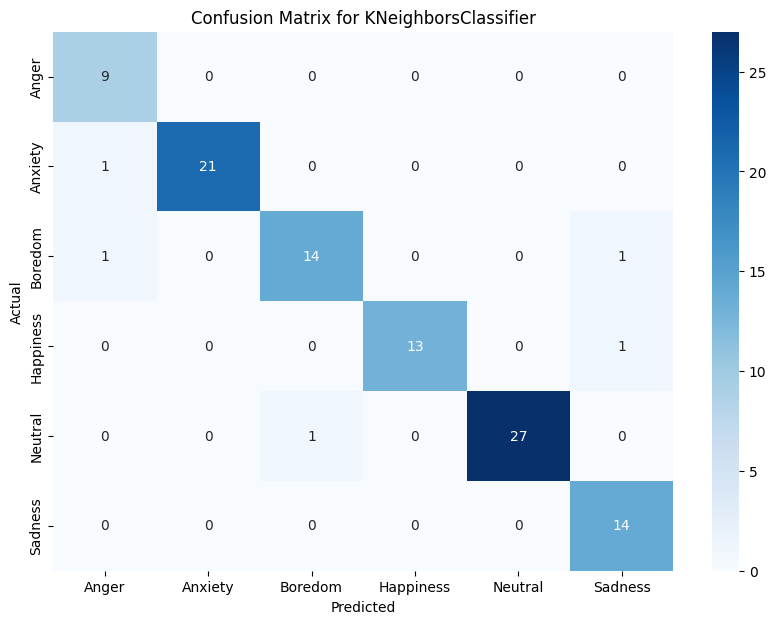

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def evaluate_and_plot(model, X_train, y_train, X_test, y_test):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    print(f'Cross-validated accuracies: {accuracies}')
    print(f'Mean accuracy: {np.mean(accuracies)}')

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
    print('Test Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Test Classification Report:')
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred, title=f'Confusion Matrix for {model.__class__.__name__}')

for name, model in models.items():
    print(f'\n{name} Model Evaluation:')
    evaluate_and_plot(model, X_train, y_train, X_test, y_test)


In [ ]:
label_encoders = {}
for column in ['Dominant_Emotion']:
    le = LabelEncoder()
    combined_df[column] = le.fit_transform(combined_df[column])
    train_df[column] = le.transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

correlation = train_df.corr()

correlation_target = correlation['Dominant_Emotion'].sort_values(ascending=False)
print(correlation_target)


Dominant_Emotion              1.000000
Gender                        0.111023
Daily_Usage_Time (minutes)   -0.009664
Likes_Received_Per_Day       -0.013585
Posts_Per_Day                -0.018626
Messages_Sent_Per_Day        -0.035485
Comments_Received_Per_Day    -0.113146
Platform                     -0.202766
Age                          -0.221475
Name: Dominant_Emotion, dtype: float64


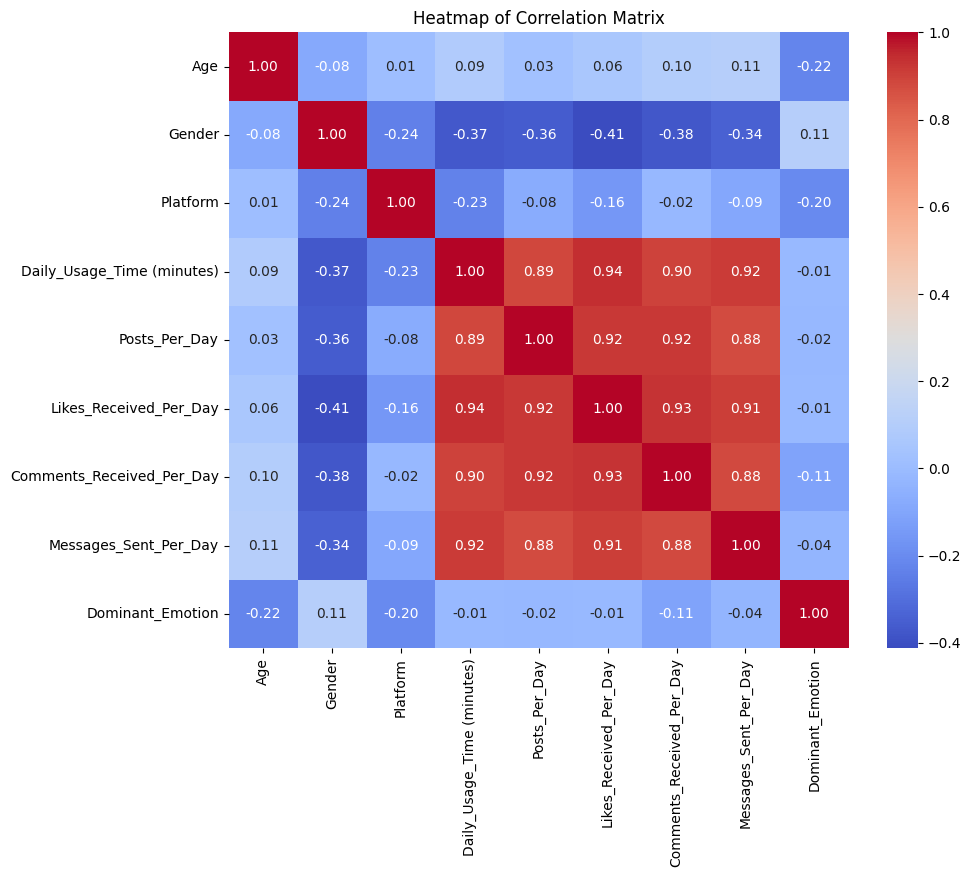

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap of Correlation Matrix')
plt.show()

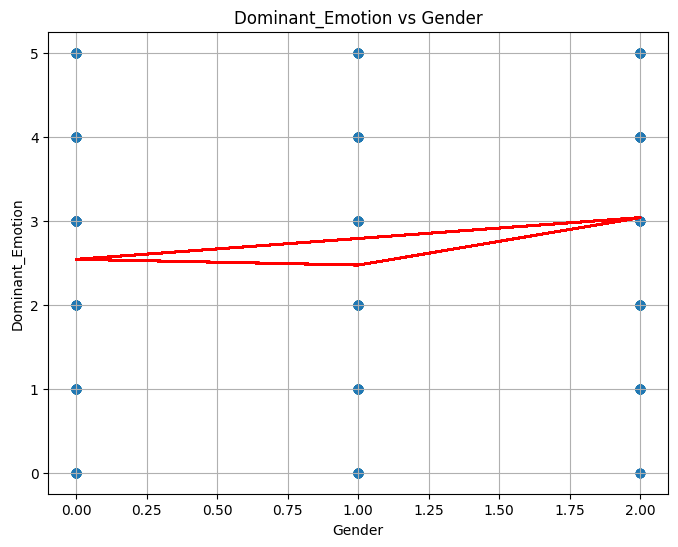

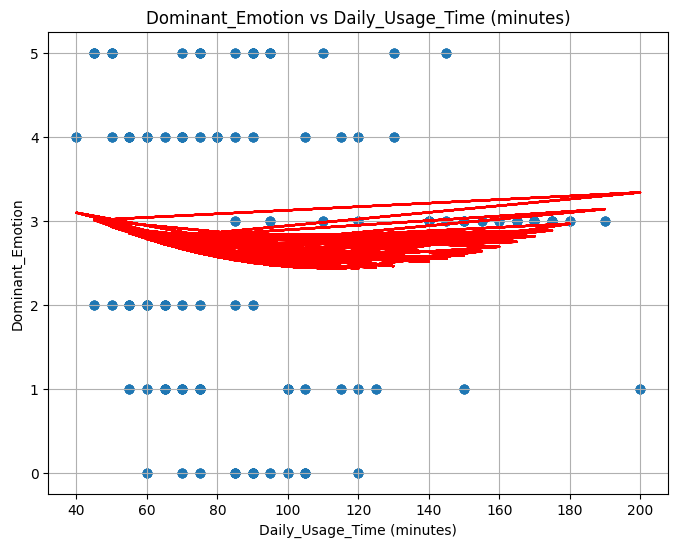

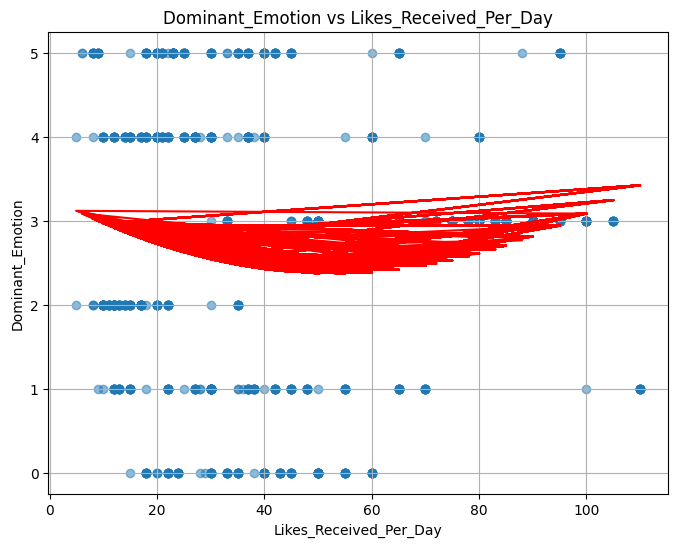

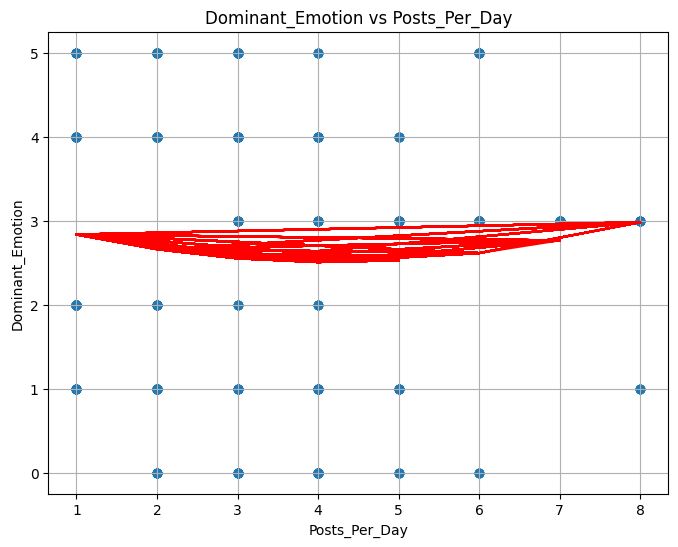

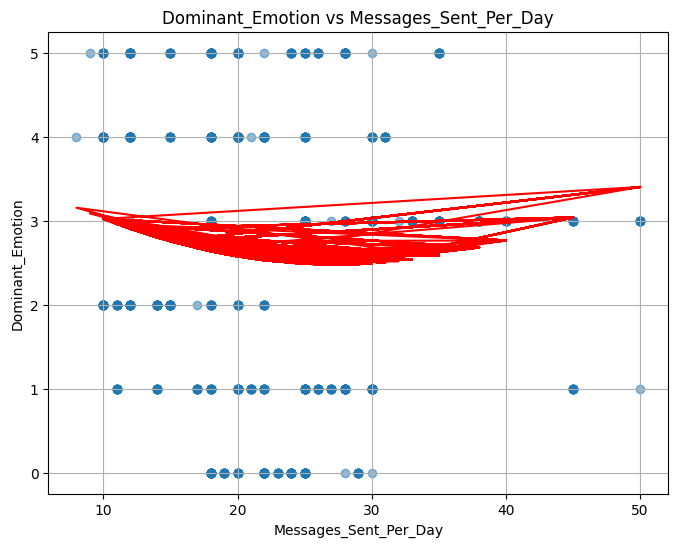

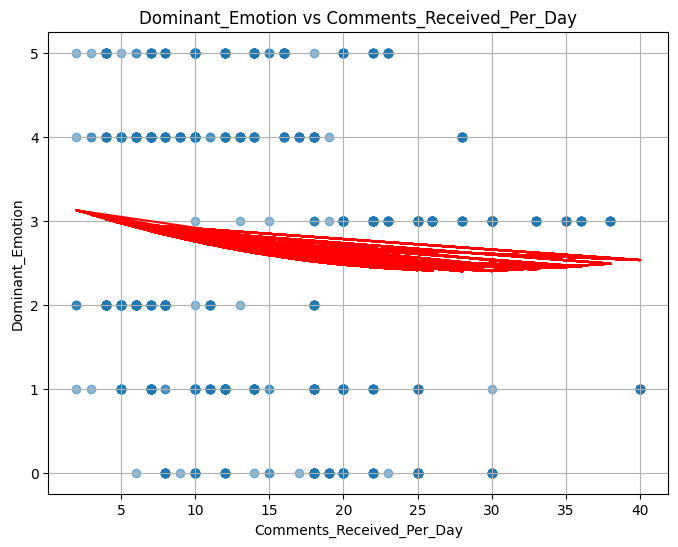

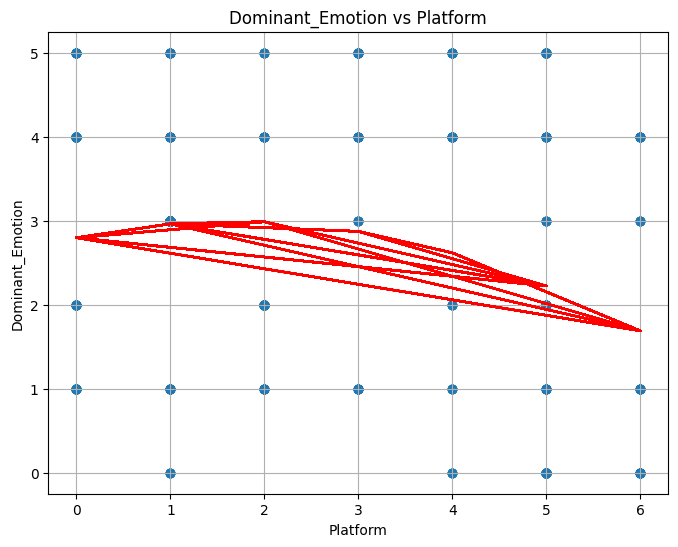

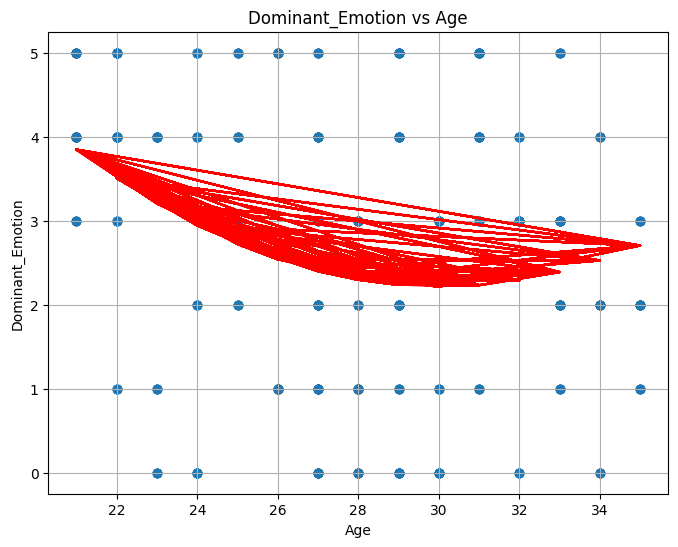

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

attributes = ['Gender', 'Daily_Usage_Time (minutes)', 'Likes_Received_Per_Day', 'Posts_Per_Day', 'Messages_Sent_Per_Day', 'Comments_Received_Per_Day', 'Platform', 'Age']

def plot_polynomial_fit(x, y, degree=2):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.reshape(-1, 1))
    poly.fit(x_poly, y)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    plt.plot(x, lin_reg.predict(poly.fit_transform(x.reshape(-1, 1))), color='red')

for attribute in attributes:
    plt.figure(figsize=(8, 6))
    plt.scatter(train_df[attribute], train_df['Dominant_Emotion'], alpha=0.5)
    plt.title(f'Dominant_Emotion vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Dominant_Emotion')
    plt.grid(True)

    plot_polynomial_fit(train_df[attribute].values, train_df['Dominant_Emotion'].values, degree=2)

    plt.show()